In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
df=pd.read_csv("kumakumain.csv")
df.head()

,no_pesanan,status_pesanan,alasan_pembatalan,status_pembatalan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,pesanan_harus_dikirimkan_sebelum,waktu_pengiriman_diatur,waktu_pesanan_dibuat,...,perkiraan_ongkos_kirim,catatan_dari_pembeli,catatan,username_pembeli,nama_penerima,no_telepon,alamat_pengiriman,kota_kabupaten,provinsi,waktu_pesanan_selesai
0,20070191FAB9T6,Selesai,NaN,NaN,030240044227820,JNE OKE,Antar ke Counter,2020-07-06 20:55,2020-07-02 14:07,2020-07-01 20:53,...,err,NaN,NaN,inipunyadila,N******n,******48,Ja******,KOTA SURABAYA,JAWA TIMUR,2020-07-03 17:56
1,200702A1S4WJH8,Selesai,NaN,NaN,JP5210282305,J&T Express,Antar ke Counter,2020-07-07 06:34,2020-07-02 19:24,2020-07-02 06:31,...,err,NaN,NaN,pettygrae,P******e,******09,Ja******,KAB. SUMENEP,JAWA TIMUR,2020-07-03 11:46
2,200703CUHVM2KE,Selesai,NaN,NaN,JP7408814003,J&T Express,Antar ke Counter,2020-07-08 09:18,2020-07-03 19:16,2020-07-03 09:18,...,err,NaN,NaN,nialljh.17,K******h,******03,Ja******,KAB. GRESIK,JAWA TIMUR,2020-07-04 17:53
3,200704GJ54DH52,Selesai,NaN,NaN,030240045096320,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-08 23:00,2020-07-06 13:00,2020-07-04 20:40,...,err,NaN,NaN,eric20_,N**a,******21,Ka******,KOTA BATAM,KEPULAUAN RIAU,2020-07-09 15:57
4,200706MT2CS7H9,Selesai,NaN,NaN,030240045422820,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-09 16:37,2020-07-07 12:43,2020-07-06 13:13,...,err,NaN,NaN,syarifatus0811,S***i,******17,Jl******,KAB. GRESIK,JAWA TIMUR,2020-07-08 16:40


In [3]:
df.tail()

,no_pesanan,status_pesanan,alasan_pembatalan,status_pembatalan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,pesanan_harus_dikirimkan_sebelum,waktu_pengiriman_diatur,waktu_pesanan_dibuat,...,perkiraan_ongkos_kirim,catatan_dari_pembeli,catatan,username_pembeli,nama_penerima,no_telepon,alamat_pengiriman,kota_kabupaten,provinsi,waktu_pesanan_selesai
1105,210517UEUUH6WT,Selesai,NaN,NaN,JP2629288475,Reguler (Cashless),Antar ke Counter,2021-05-19 16:45,2021-05-18 16:45,2021-05-17 16:41,...,err,NaN,NaN,bayuhadim,B******),******72,Pe******,KAB MALANG,JAWA TIMUR,2021-05-20 16:37
1106,210517UEUUH6WT,Selesai,NaN,NaN,JP2629288475,Reguler (Cashless),Antar ke Counter,2021-05-19 16:45,2021-05-18 16:45,2021-05-17 16:41,...,err,NaN,NaN,bayuhadim,B******),******72,Pe******,KAB MALANG,JAWA TIMUR,2021-05-20 16:37
1107,210517UEUUH6WT,Selesai,NaN,NaN,JP2629288475,Reguler (Cashless),Antar ke Counter,2021-05-19 16:45,2021-05-18 16:45,2021-05-17 16:41,...,err,NaN,NaN,bayuhadim,B******),******72,Pe******,KAB MALANG,JAWA TIMUR,2021-05-20 16:37
1108,21051803JBPCA2,Selesai,NaN,NaN,JP4559158436,Reguler (Cashless),Antar ke Counter,2021-05-20 09:24,2021-05-18 16:45,2021-05-18 09:23,...,err,NaN,NaN,buernaa,L******i,******82,Jl******,KAB GRESIK,JAWA TIMUR,2021-05-19 12:46
1109,210527PBBJYYU5,Selesai,NaN,NaN,JP7479913788,Reguler (Cashless),Antar ke Counter,2021-05-31 05:42,2021-05-27 18:07,2021-05-27 05:41,...,err,NaN,NaN,miaafrilias,i******),******66,Ds******,KAB JOMBANG,JAWA TIMUR,2021-05-29 00:36


In [4]:
df.shape

(1110, 49)

Data Preprocessing

In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   no_pesanan                          1110 non-null   object 
 1   status_pesanan                      1110 non-null   object 
 2   alasan_pembatalan                   189 non-null    object 
 3   status_pembatalan                   0 non-null      float64
 4   no_resi                             923 non-null    object 
 5   opsi_pengiriman                     1110 non-null   object 
 6   antarkecounter_ataupickup           1110 non-null   object 
 7   pesanan_harus_dikirimkan_sebelum    942 non-null    object 
 8   waktu_pengiriman_diatur             921 non-null    object 
 9   waktu_pesanan_dibuat                1110 non-null   object 
 10  waktu_pembayaran_dilakukan          1110 non-null   object 
 11  metode_pembayaran                   1102 no

In [6]:
# Check Duplicate Data
duplikat = df[df.duplicated()]

print("Data Duplikat : ")
duplikat

Data Duplikat : 


,no_pesanan,status_pesanan,alasan_pembatalan,status_pembatalan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,pesanan_harus_dikirimkan_sebelum,waktu_pengiriman_diatur,waktu_pesanan_dibuat,...,perkiraan_ongkos_kirim,catatan_dari_pembeli,catatan,username_pembeli,nama_penerima,no_telepon,alamat_pengiriman,kota_kabupaten,provinsi,waktu_pesanan_selesai


In [7]:
# Hapus data duplikat
df = df.drop_duplicates()

Feature Selection - Variable Reduction

In [8]:
# Remove Attributes that Have No Effect on the Model
df.drop(["pesanan_harus_dikirimkan_sebelum", "waktu_pengiriman_diatur", "waktu_pesanan_selesai", "sku_induk","nomor_referensi_sku","diskon_dari_shopee","voucher_ditanggung_penjual","cashback_koin","voucher_ditanggung_shopee","paket_diskon_dari_shopee","paket_diskon_dari_penjual","potongan_koin_shopee","ongkos_kirim_dibayar_oleh_pembeli","perkiraan_ongkos_kirim","catatan_dari_pembeli","catatan","nama_penerima","no_telepon","alamat_pengiriman","status_pembatalan","alasan_pembatalan","total_pembayaran", "perkiraan_ongkos_kirim","estimasi_potongan_biaya_pengiriman","ongkos_kirim_pengembalian_barang","diskon_kartu_kredit","ongkos_kirim_dibayar_oleh_pembeli","paket_diskon","returned_quantity"],axis=1,inplace=True)
df.head()

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pesanan_dibuat,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,...,jumlah,total_harga_produk,total_diskon,diskon_dari_penjual,berat_produk,jumlah_produk_dipesan,total_berat,username_pembeli,kota_kabupaten,provinsi
0,20070191FAB9T6,Selesai,030240044227820,JNE OKE,Antar ke Counter,2020-07-01 20:53,2020-07-01 20:55,Online Payment,Facemist Zamzam Saffron Termurah,NaN,...,1,35000,-35000,-35000,150,1,150,inipunyadila,KOTA SURABAYA,JAWA TIMUR
1,200702A1S4WJH8,Selesai,JP5210282305,J&T Express,Antar ke Counter,2020-07-02 06:31,2020-07-02 06:34,Online Payment,Facemist Zamzam Saffron Termurah,NaN,...,1,35000,-35000,-35000,150,1,150,pettygrae,KAB. SUMENEP,JAWA TIMUR
2,200703CUHVM2KE,Selesai,JP7408814003,J&T Express,Antar ke Counter,2020-07-03 09:18,2020-07-03 09:18,ShopeePay,Facemist Zamzam Saffron Termurah,NaN,...,1,35000,-35000,-35000,150,1,150,nialljh.17,KAB. GRESIK,JAWA TIMUR
3,200704GJ54DH52,Selesai,030240045096320,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-04 20:40,2020-07-04 20:43,Online Payment,Facemist Zamzam Saffron Termurah,NaN,...,3,100500,-100500,-100500,450,3,450,eric20_,KOTA BATAM,KEPULAUAN RIAU
4,200706MT2CS7H9,Selesai,030240045422820,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-06 13:13,2020-07-06 16:37,Alfamart/Alfamidi/Dan+Dan,Facemist Zamzam Saffron Termurah,NaN,...,1,35000,-35000,-35000,150,1,150,syarifatus0811,KAB. GRESIK,JAWA TIMUR


In [9]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_pesanan                  1110 non-null   object 
 1   status_pesanan              1110 non-null   object 
 2   no_resi                     923 non-null    object 
 3   opsi_pengiriman             1110 non-null   object 
 4   antarkecounter_ataupickup   1110 non-null   object 
 5   waktu_pesanan_dibuat        1110 non-null   object 
 6   waktu_pembayaran_dilakukan  1110 non-null   object 
 7   metode_pembayaran           1102 non-null   object 
 8   nama_produk                 1110 non-null   object 
 9   nama_variasi                189 non-null    object 
 10  harga_awal                  1110 non-null   float64
 11  harga_setelah_diskon        1110 non-null   float64
 12  jumlah                      1110 non-null   int64  
 13  total_harga_produk          1110 

Split Datetime

In [10]:
# Mengubah kolom waktu_pesanan_dibuat menjadi format datetime
df['waktu_pesanan_dibuat'] = pd.to_datetime(df['waktu_pesanan_dibuat'])

# Membagi kolom waktu_pesanan_dibuat menjadi kolom baru
df['tahun_pesanan_dibuat'] = df['waktu_pesanan_dibuat'].dt.year
df['bulan_pesanan_dibuat'] = df['waktu_pesanan_dibuat'].dt.month
df['tanggal_pesanan_dibuat'] = df['waktu_pesanan_dibuat'].dt.day
df['jam_pesanan_dibuat'] = df['waktu_pesanan_dibuat'].dt.hour
df['menit_pesanan_dibuat'] = df['waktu_pesanan_dibuat'].dt.minute

# Menampilkan hasil
print(df)

          no_pesanan status_pesanan          no_resi  \
0     20070191FAB9T6        Selesai  030240044227820   
1     200702A1S4WJH8        Selesai     JP5210282305   
2     200703CUHVM2KE        Selesai     JP7408814003   
3     200704GJ54DH52        Selesai  030240045096320   
4     200706MT2CS7H9        Selesai  030240045422820   
...              ...            ...              ...   
1105  210517UEUUH6WT        Selesai     JP2629288475   
1106  210517UEUUH6WT        Selesai     JP2629288475   
1107  210517UEUUH6WT        Selesai     JP2629288475   
1108  21051803JBPCA2        Selesai     JP4559158436   
1109  210527PBBJYYU5        Selesai     JP7479913788   

                 opsi_pengiriman antarkecounter_ataupickup  \
0                        JNE OKE          Antar ke Counter   
1                    J&T Express          Antar ke Counter   
2                    J&T Express          Antar ke Counter   
3     JNE Reguler (Non-Cashless)          Antar ke Counter   
4     JNE Reguler

In [11]:
# Remove Attributes that Have No Effect on the Model
df.drop(["waktu_pesanan_dibuat"],axis=1,inplace=True)
df.head()

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,jumlah_produk_dipesan,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat
0,20070191FAB9T6,Selesai,030240044227820,JNE OKE,Antar ke Counter,2020-07-01 20:55,Online Payment,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,inipunyadila,KOTA SURABAYA,JAWA TIMUR,2020,7,1,20,53
1,200702A1S4WJH8,Selesai,JP5210282305,J&T Express,Antar ke Counter,2020-07-02 06:34,Online Payment,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,pettygrae,KAB. SUMENEP,JAWA TIMUR,2020,7,2,6,31
2,200703CUHVM2KE,Selesai,JP7408814003,J&T Express,Antar ke Counter,2020-07-03 09:18,ShopeePay,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,nialljh.17,KAB. GRESIK,JAWA TIMUR,2020,7,3,9,18
3,200704GJ54DH52,Selesai,030240045096320,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-04 20:43,Online Payment,Facemist Zamzam Saffron Termurah,NaN,0.0,...,3,450,eric20_,KOTA BATAM,KEPULAUAN RIAU,2020,7,4,20,40
4,200706MT2CS7H9,Selesai,030240045422820,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-06 16:37,Alfamart/Alfamidi/Dan+Dan,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,syarifatus0811,KAB. GRESIK,JAWA TIMUR,2020,7,6,13,13


DATA IMPUTATION

In [12]:
def replace_missing_values(df):
  # List of columns to replace missing values in
  columns = ["no_resi"]

  # Replace missing values with "dibatalkan"
  for column in columns:
    df[column].fillna("dibatalkan", inplace=True)

  return df

# Replace missing values in the dataFrame
df = replace_missing_values(df)

In [13]:
df["waktu_pembayaran_dilakukan"] = df["waktu_pembayaran_dilakukan"].replace("-", "dibatalkan")

In [14]:
df.head(50)

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,jumlah_produk_dipesan,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat
0,20070191FAB9T6,Selesai,030240044227820,JNE OKE,Antar ke Counter,2020-07-01 20:55,Online Payment,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,inipunyadila,KOTA SURABAYA,JAWA TIMUR,2020,7,1,20,53
1,200702A1S4WJH8,Selesai,JP5210282305,J&T Express,Antar ke Counter,2020-07-02 06:34,Online Payment,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,pettygrae,KAB. SUMENEP,JAWA TIMUR,2020,7,2,6,31
2,200703CUHVM2KE,Selesai,JP7408814003,J&T Express,Antar ke Counter,2020-07-03 09:18,ShopeePay,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,nialljh.17,KAB. GRESIK,JAWA TIMUR,2020,7,3,9,18
3,200704GJ54DH52,Selesai,030240045096320,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-04 20:43,Online Payment,Facemist Zamzam Saffron Termurah,NaN,0.0,...,3,450,eric20_,KOTA BATAM,KEPULAUAN RIAU,2020,7,4,20,40
4,200706MT2CS7H9,Selesai,030240045422820,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-06 16:37,Alfamart/Alfamidi/Dan+Dan,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,syarifatus0811,KAB. GRESIK,JAWA TIMUR,2020,7,6,13,13
5,200706NHQYPRCW,Selesai,030240045707420,JNE OKE,Antar ke Counter,2020-07-07 15:56,Online Payment,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,anjaliyasalma,KOTA SURABAYA,JAWA TIMUR,2020,7,6,20,16
6,200717KQXHHJM0,Selesai,JP8941312558,J&T Express,Antar ke Counter,2020-07-17 16:49,ShopeePay,Facemist Zamzam Saffron Termurah,NaN,0.0,...,4,600,dewinurh11,KAB. TANGERANG,BANTEN,2020,7,17,16,49
7,2007235CJ829KJ,Selesai,JP4599166190,J&T Express,Antar ke Counter,2020-07-23 15:35,Indomaret/i.Saku,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,prameswariayunda,KOTA SURABAYA,JAWA TIMUR,2020,7,23,13,34
8,2007248EK5YB3J,Batal,dibatalkan,J&T Express,Antar ke Counter,dibatalkan,Indomaret/i.Saku,Facemist Zamzam Saffron Termurah,NaN,0.0,...,1,150,maulidiatunikmah02,KAB. GRESIK,JAWA TIMUR,2020,7,24,18,49
9,200731SVQUC1R6,Selesai,JP9011060023,J&T Express,Antar ke Counter,2020-07-31 17:18,ShopeePay,Facemist Zamzam Saffron Kashmir Premium,NaN,0.0,...,5,750,sitimaslichah11,KAB. NGANJUK,JAWA TIMUR,2020,7,31,17,17


In [15]:
df.tail(50)

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,jumlah_produk_dipesan,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat
1060,210320TJXGHE9C,Selesai,JP7787254354,Reguler (Cashless),Antar ke Counter,2021-03-20 11:28,ShopeePay,Masker Wajah by Lea Gloria BPOM,eentea Clay,3999.0,...,3,194,tjhaichunsie,KOTA SINGKAWANG,KALIMANTAN BARAT,2021,3,20,11,28
1061,2103210SE31UEX,Selesai,JP5126891424,Reguler (Cashless),Antar ke Counter,2021-03-21 19:41,Bank Lainnya (Dicek Manual),Paket Hemat [Saffron Water with Facemask] BPOM,"Masker Saffron BPOM,eentea Clay",28000.0,...,2,320,rafidarahma0917,KOTA MALANG,JAWA TIMUR,2021,3,21,19,1
1062,2103210SE31UEX,Selesai,JP5126891424,Reguler (Cashless),Antar ke Counter,2021-03-21 19:41,Bank Lainnya (Dicek Manual),Paket Hemat [Saffron Water with Facemask] BPOM,"Masker Saffron BPOM,Vanilla Milk",28000.0,...,2,320,rafidarahma0917,KOTA MALANG,JAWA TIMUR,2021,3,21,19,1
1063,21032111AAM262,Selesai,JP8397736987,Reguler (Cashless),Antar ke Counter,2021-03-21 21:23,SPayLater,Set Mangkuk Masker Kayu dan Kuas Silikon,NaN,23000.0,...,1,140,henyyuliaa87,KOTA SAMARINDA,KALIMANTAN TIMUR,2021,3,21,21,22
1064,2103222SB4V6VX,Selesai,JP8702029030,Reguler (Cashless),Antar ke Counter,2021-03-22 14:38,Online Payment,Paket Hemat [Saffron Water with Facemask] BPOM,"Masker Saffron BPOM,Golden Beauty",28000.0,...,1,160,NaN,KAB BANTUL,DI YOGYAKARTA,2021,3,22,14,5
1065,210328JFPC6BE5,Selesai,JP7133043457,Reguler (Cashless),Antar ke Counter,2021-03-28 19:55,ShopeePay,Set Mangkuk Masker Kayu dan Kuas Silikon,NaN,23000.0,...,1,140,tasya1197,KOTA TARAKAN,KALIMANTAN UTARA,2021,3,28,19,55
1066,210401UNQ1VQ4N,Selesai,JP5062885408,Reguler (Cashless),Antar ke Counter,2021-04-01 11:37,ShopeePay,POT LULUR 50 / POT POMADE 50,Hitam,990.0,...,50,850,naufalzakyamrullah,KAB JOMBANG,JAWA TIMUR,2021,4,1,11,37
1067,210401UNQ1VQ4N,Selesai,JP5062885408,Reguler (Cashless),Antar ke Counter,2021-04-01 11:37,ShopeePay,POT LULUR 50 / POT POMADE 50,Putih,990.0,...,50,850,naufalzakyamrullah,KAB JOMBANG,JAWA TIMUR,2021,4,1,11,37
1068,2104021BAHTSHU,Selesai,JP1645423073,Reguler (Cashless),Antar ke Counter,2021-04-02 14:29,Indomaret/iSaku,Set Mangkuk Masker Kayu dan Kuas Silikon,NaN,23000.0,...,1,140,zahradwimaryana_17,KOTA JAKARTA TIMUR,DKI JAKARTA,2021,4,2,14,8
1069,2104033GQ8032R,Selesai,JP3448162357,Reguler (Cashless),Antar ke Counter,2021-04-03 10:50,ShopeePay,Set Mangkuk Masker Kayu dan Kuas Silikon,NaN,23000.0,...,3,170,puttrianandaaaa,KAB TANGERANG,BANTEN,2021,4,3,10,50


In [16]:
def replace_missing_values(df):
  # List of columns to replace missing values in
  columns = ["metode_pembayaran"]

  # Replace missing values with "metode pembayaran lain"
  for column in columns:
    df[column].fillna("metode pembayaran lain", inplace=True)

  return df

# Replace missing values in the dataFrame
df = replace_missing_values(df)

In [17]:
def replace_missing_values(df):
  # List of columns to replace missing values in
  columns = ["nama_variasi"]

  # Replace missing values with "random"
  for column in columns:
    df[column].fillna("random", inplace=True)

  return df

# Replace missing values in the dataFrame
df = replace_missing_values(df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_pesanan                  1110 non-null   object 
 1   status_pesanan              1110 non-null   object 
 2   no_resi                     1110 non-null   object 
 3   opsi_pengiriman             1110 non-null   object 
 4   antarkecounter_ataupickup   1110 non-null   object 
 5   waktu_pembayaran_dilakukan  1110 non-null   object 
 6   metode_pembayaran           1110 non-null   object 
 7   nama_produk                 1110 non-null   object 
 8   nama_variasi                1110 non-null   object 
 9   harga_awal                  1110 non-null   float64
 10  harga_setelah_diskon        1110 non-null   float64
 11  jumlah                      1110 non-null   int64  
 12  total_harga_produk          1110 non-null   int64  
 13  total_diskon                1110 

In [19]:
def replace_missing_values(df):
  # List of columns to replace missing values in
  columns = ["username_pembeli"]

  # Replace missing values with "none"
  for column in columns:
    df[column].fillna("none", inplace=True)

  return df

# Replace missing values in the dataFrame
df = replace_missing_values(df)

In [20]:
df.isna().sum()

no_pesanan                    0
status_pesanan                0
no_resi                       0
opsi_pengiriman               0
antarkecounter_ataupickup     0
waktu_pembayaran_dilakukan    0
metode_pembayaran             0
nama_produk                   0
nama_variasi                  0
harga_awal                    0
harga_setelah_diskon          0
jumlah                        0
total_harga_produk            0
total_diskon                  0
diskon_dari_penjual           0
berat_produk                  0
jumlah_produk_dipesan         0
total_berat                   0
username_pembeli              0
kota_kabupaten                0
provinsi                      0
tahun_pesanan_dibuat          0
bulan_pesanan_dibuat          0
tanggal_pesanan_dibuat        0
jam_pesanan_dibuat            0
menit_pesanan_dibuat          0
dtype: int64

DATA TRANSFORMATION

Encoding (Categorical to Numeric) with One Hot Encoding

In [21]:
# Create Numeric and Categorical Lists
cat_list=[i for i in df.select_dtypes("object")]
num_list=[i for i in df.select_dtypes(["int32","int64","float64"])]

In [22]:
cat_list

['no_pesanan',
 'status_pesanan',
 'no_resi',
 'opsi_pengiriman',
 'antarkecounter_ataupickup',
 'waktu_pembayaran_dilakukan',
 'metode_pembayaran',
 'nama_produk',
 'nama_variasi',
 'username_pembeli',
 'kota_kabupaten',
 'provinsi']

In [23]:
num_list

['harga_awal',
 'harga_setelah_diskon',
 'jumlah',
 'total_harga_produk',
 'total_diskon',
 'diskon_dari_penjual',
 'berat_produk',
 'jumlah_produk_dipesan',
 'total_berat',
 'tahun_pesanan_dibuat',
 'bulan_pesanan_dibuat',
 'tanggal_pesanan_dibuat',
 'jam_pesanan_dibuat',
 'menit_pesanan_dibuat']

In [24]:
# Encoding
# Convert String Values to Numeric Values
data = df.select_dtypes("object")

In [25]:
print(data['no_pesanan'].unique())
print(data['status_pesanan'].unique())
print(data['no_resi'].unique())
print(data['opsi_pengiriman'].unique())
print(data['antarkecounter_ataupickup'].unique())
print(data['waktu_pembayaran_dilakukan'].unique())
print(data['metode_pembayaran'].unique())
print(data['nama_produk'].unique())
print(data['nama_variasi'].unique())
print(data['username_pembeli'].unique())
print(data['kota_kabupaten'].unique())
print(data['provinsi'].unique())

['20070191FAB9T6' '200702A1S4WJH8' '200703CUHVM2KE' '200704GJ54DH52'
 '200706MT2CS7H9' '200706NHQYPRCW' '200717KQXHHJM0' '2007235CJ829KJ'
 '2007248EK5YB3J' '200731SVQUC1R6' '200731T8UN35H4' '200801U7BDDFYT'
 '20080226JEK3BR' '20080342UE4DK1' '2008034K76URBX' '2008057PG1V33F'
 '2008058VWY152A' '200806BW73FPB5' '200806CD79TNR8' '200807DM3N47Q3'
 '200807E7Q3Q3CR' '200807EPXBGVRX' '200807ES4SB6HR' '200808F45JD461'
 '200808GAAJXGDW' '200808GBACFGNF' '200808GJRVD8VY' '200808GKPEB2NW'
 '200808GU98WQFD' '200808H2KGKYEC' '200808H4U1EBDB' '200809J9ARBHPS'
 '200809JE7K3V9X' '200809K3AX1U24' '200810NP538EPC' '200812T7PX0N9K'
 '200812T9PXN8S9' '200812TA0PBWAC' '200812TAYTW3BY' '200812UECQXS19'
 '2008142XBGHJ68' '2008142XF6PUMU' '200818D4Y6346C' '200824U4K24X7B'
 '2008251PW7GNE4' '2008262Y2VPBWR' '200830C9DRNB7K' '200830CC6NW26U'
 '200831GJMF9VAK' '20090758WA607U' '20090988MMC37J' '200911FJQ1CTTG'
 '200914P2JKMHCG' '200915RH9F208E' '200915RX9VT8K4' '200915SFHFAK81'
 '2009182UG99N42' '200921BF3GVSXF'

In [26]:
df.head(5)

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,jumlah_produk_dipesan,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat
0,20070191FAB9T6,Selesai,030240044227820,JNE OKE,Antar ke Counter,2020-07-01 20:55,Online Payment,Facemist Zamzam Saffron Termurah,random,0.0,...,1,150,inipunyadila,KOTA SURABAYA,JAWA TIMUR,2020,7,1,20,53
1,200702A1S4WJH8,Selesai,JP5210282305,J&T Express,Antar ke Counter,2020-07-02 06:34,Online Payment,Facemist Zamzam Saffron Termurah,random,0.0,...,1,150,pettygrae,KAB. SUMENEP,JAWA TIMUR,2020,7,2,6,31
2,200703CUHVM2KE,Selesai,JP7408814003,J&T Express,Antar ke Counter,2020-07-03 09:18,ShopeePay,Facemist Zamzam Saffron Termurah,random,0.0,...,1,150,nialljh.17,KAB. GRESIK,JAWA TIMUR,2020,7,3,9,18
3,200704GJ54DH52,Selesai,030240045096320,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-04 20:43,Online Payment,Facemist Zamzam Saffron Termurah,random,0.0,...,3,450,eric20_,KOTA BATAM,KEPULAUAN RIAU,2020,7,4,20,40
4,200706MT2CS7H9,Selesai,030240045422820,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-06 16:37,Alfamart/Alfamidi/Dan+Dan,Facemist Zamzam Saffron Termurah,random,0.0,...,1,150,syarifatus0811,KAB. GRESIK,JAWA TIMUR,2020,7,6,13,13


In [27]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [28]:
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

In [29]:
# Converting type of columns to category
data['status_pesanan'] = data['status_pesanan'].astype('category')
data['opsi_pengiriman'] = data['opsi_pengiriman'].astype('category')
data['antarkecounter_ataupickup'] = data['antarkecounter_ataupickup'].astype('category')
data['waktu_pembayaran_dilakukan'] = data['waktu_pembayaran_dilakukan'].astype('category')
data['metode_pembayaran'] = data['metode_pembayaran'].astype('category')
data['nama_produk'] = data['nama_produk'].astype('category')
data['nama_variasi'] = data['nama_variasi'].astype('category')
data['username_pembeli'] = data['username_pembeli'].astype('category')
data['kota_kabupaten'] = data['kota_kabupaten'].astype('category')
data['provinsi'] = data['provinsi'].astype('category')

# Assigning numerical values and storing it in another columns
data['status_pesanan_new'] = data['status_pesanan'].cat.codes
data['opsi_pengiriman_new'] = data['opsi_pengiriman'].cat.codes
data['antarkecounter_ataupickup_new'] = data['antarkecounter_ataupickup'].cat.codes
data['waktu_pembayaran_dilakukan_new'] = data['waktu_pembayaran_dilakukan'].cat.codes
data['metode_pembayaran_new'] = data['metode_pembayaran'].cat.codes
data['nama_produk_new'] = data['nama_produk'].cat.codes
data['nama_variasi_new'] = data['nama_variasi'].cat.codes
data['username_pembeli_new'] = data['username_pembeli'].cat.codes
data['kota_kabupaten_new'] = data['kota_kabupaten'].cat.codes
data['provinsi_new'] = data['provinsi'].cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns
enc_data = pd.DataFrame(enc.fit_transform(
    data[['status_pesanan_new', 'opsi_pengiriman_new', 'antarkecounter_ataupickup_new', 'waktu_pembayaran_dilakukan_new', 'metode_pembayaran_new', 'nama_produk_new', 'nama_variasi_new', 'username_pembeli_new', 'kota_kabupaten_new', 'provinsi_new']]).toarray())

# Merge with main
New_df = data.join(enc_data)

New_df.head(50)

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,username_pembeli,...,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831
0,20070191FAB9T6,Selesai,030240044227820,JNE OKE,Antar ke Counter,2020-07-01 20:55,Online Payment,Facemist Zamzam Saffron Termurah,random,inipunyadila,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200702A1S4WJH8,Selesai,JP5210282305,J&T Express,Antar ke Counter,2020-07-02 06:34,Online Payment,Facemist Zamzam Saffron Termurah,random,pettygrae,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200703CUHVM2KE,Selesai,JP7408814003,J&T Express,Antar ke Counter,2020-07-03 09:18,ShopeePay,Facemist Zamzam Saffron Termurah,random,nialljh.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,200704GJ54DH52,Selesai,030240045096320,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-04 20:43,Online Payment,Facemist Zamzam Saffron Termurah,random,eric20_,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,200706MT2CS7H9,Selesai,030240045422820,JNE Reguler (Non-Cashless),Antar ke Counter,2020-07-06 16:37,Alfamart/Alfamidi/Dan+Dan,Facemist Zamzam Saffron Termurah,random,syarifatus0811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,200706NHQYPRCW,Selesai,030240045707420,JNE OKE,Antar ke Counter,2020-07-07 15:56,Online Payment,Facemist Zamzam Saffron Termurah,random,anjaliyasalma,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,200717KQXHHJM0,Selesai,JP8941312558,J&T Express,Antar ke Counter,2020-07-17 16:49,ShopeePay,Facemist Zamzam Saffron Termurah,random,dewinurh11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2007235CJ829KJ,Selesai,JP4599166190,J&T Express,Antar ke Counter,2020-07-23 15:35,Indomaret/i.Saku,Facemist Zamzam Saffron Termurah,random,prameswariayunda,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2007248EK5YB3J,Batal,dibatalkan,J&T Express,Antar ke Counter,dibatalkan,Indomaret/i.Saku,Facemist Zamzam Saffron Termurah,random,maulidiatunikmah02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,200731SVQUC1R6,Selesai,JP9011060023,J&T Express,Antar ke Counter,2020-07-31 17:18,ShopeePay,Facemist Zamzam Saffron Kashmir Premium,random,sitimaslichah11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
New_df.tail(50)

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,username_pembeli,...,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831
1060,210320TJXGHE9C,Selesai,JP7787254354,Reguler (Cashless),Antar ke Counter,2021-03-20 11:28,ShopeePay,Masker Wajah by Lea Gloria BPOM,eentea Clay,tjhaichunsie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1061,2103210SE31UEX,Selesai,JP5126891424,Reguler (Cashless),Antar ke Counter,2021-03-21 19:41,Bank Lainnya (Dicek Manual),Paket Hemat [Saffron Water with Facemask] BPOM,"Masker Saffron BPOM,eentea Clay",rafidarahma0917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1062,2103210SE31UEX,Selesai,JP5126891424,Reguler (Cashless),Antar ke Counter,2021-03-21 19:41,Bank Lainnya (Dicek Manual),Paket Hemat [Saffron Water with Facemask] BPOM,"Masker Saffron BPOM,Vanilla Milk",rafidarahma0917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1063,21032111AAM262,Selesai,JP8397736987,Reguler (Cashless),Antar ke Counter,2021-03-21 21:23,SPayLater,Set Mangkuk Masker Kayu dan Kuas Silikon,random,henyyuliaa87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064,2103222SB4V6VX,Selesai,JP8702029030,Reguler (Cashless),Antar ke Counter,2021-03-22 14:38,Online Payment,Paket Hemat [Saffron Water with Facemask] BPOM,"Masker Saffron BPOM,Golden Beauty",none,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1065,210328JFPC6BE5,Selesai,JP7133043457,Reguler (Cashless),Antar ke Counter,2021-03-28 19:55,ShopeePay,Set Mangkuk Masker Kayu dan Kuas Silikon,random,tasya1197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1066,210401UNQ1VQ4N,Selesai,JP5062885408,Reguler (Cashless),Antar ke Counter,2021-04-01 11:37,ShopeePay,POT LULUR 50 / POT POMADE 50,Hitam,naufalzakyamrullah,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1067,210401UNQ1VQ4N,Selesai,JP5062885408,Reguler (Cashless),Antar ke Counter,2021-04-01 11:37,ShopeePay,POT LULUR 50 / POT POMADE 50,Putih,naufalzakyamrullah,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1068,2104021BAHTSHU,Selesai,JP1645423073,Reguler (Cashless),Antar ke Counter,2021-04-02 14:29,Indomaret/iSaku,Set Mangkuk Masker Kayu dan Kuas Silikon,random,zahradwimaryana_17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1069,2104033GQ8032R,Selesai,JP3448162357,Reguler (Cashless),Antar ke Counter,2021-04-03 10:50,ShopeePay,Set Mangkuk Masker Kayu dan Kuas Silikon,random,puttrianandaaaa,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df.head(50)

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,jumlah_produk_dipesan,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat
0,0,1,3,1,0,0,6,10,39,0.0,...,1,150,313,210,9,2020,7,1,20,53
1,1,1,417,0,0,1,6,10,39,0.0,...,1,150,503,151,9,2020,7,2,6,31
2,2,1,573,0,0,2,8,10,39,0.0,...,1,150,462,91,9,2020,7,3,9,18
3,3,1,4,3,0,3,6,10,39,0.0,...,3,450,224,168,15,2020,7,4,20,40
4,4,1,5,3,0,4,0,10,39,0.0,...,1,150,647,91,9,2020,7,6,13,13
5,5,1,6,1,0,5,6,10,39,0.0,...,1,150,59,210,9,2020,7,6,20,16
6,6,1,693,0,0,6,8,10,39,0.0,...,4,600,167,154,2,2020,7,17,16,49
7,7,1,372,0,0,7,3,10,39,0.0,...,1,150,507,210,9,2020,7,23,13,34
8,8,0,764,0,0,765,3,10,39,0.0,...,1,150,396,91,9,2020,7,24,18,49
9,9,1,697,0,0,8,8,9,39,0.0,...,5,750,626,126,9,2020,7,31,17,17


In [32]:
df.tail(50)

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,jumlah_produk_dipesan,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat
1060,900,1,595,5,0,740,8,12,38,3999.0,...,3,194,671,209,10,2021,3,20,11,28
1061,901,1,412,5,0,742,1,15,25,28000.0,...,2,320,529,191,9,2021,3,21,19,1
1062,901,1,412,5,0,742,1,15,24,28000.0,...,2,320,529,191,9,2021,3,21,19,1
1063,902,1,644,5,0,743,7,18,39,23000.0,...,1,140,291,206,13,2021,3,21,21,22
1064,903,1,672,5,0,744,6,15,21,28000.0,...,1,160,471,4,4,2021,3,22,14,5
1065,904,1,555,5,0,745,8,18,39,23000.0,...,1,140,658,214,14,2021,3,28,19,55
1066,905,1,404,5,0,746,8,13,15,990.0,...,50,850,449,23,9,2021,4,1,11,37
1067,905,1,404,5,0,746,8,13,34,990.0,...,50,850,449,23,9,2021,4,1,11,37
1068,906,1,148,5,0,747,4,18,39,23000.0,...,1,140,728,182,5,2021,4,2,14,8
1069,907,1,270,5,0,748,8,18,39,23000.0,...,3,170,521,59,2,2021,4,3,10,50


In [33]:
data['status_pesanan'].value_counts()

status_pesanan
Selesai    921
Batal      189
Name: count, dtype: int64

In [34]:
data['antarkecounter_ataupickup'].value_counts()

antarkecounter_ataupickup
Antar ke Counter    1110
Name: count, dtype: int64

In [35]:
data['metode_pembayaran'].value_counts()

metode_pembayaran
ShopeePay                      561
Online Payment                 130
Indomaret/i.Saku               118
SPayLater                      117
Alfamart/Alfamidi/Dan+Dan      109
Indomaret/iSaku                 46
Bank Lainnya (Dicek Manual)     16
metode pembayaran lain           8
COD (Bayar di Tempat)            3
Kartu Kredit/Debit               2
Name: count, dtype: int64

In [36]:
data['opsi_pengiriman'].value_counts()

opsi_pengiriman
J&T Express                   1012
Reguler (Cashless)              53
JNE Reguler                     38
JNE OKE                          3
JNE Reguler (Non-Cashless)       3
JNE Trucking (JTR)               1
Name: count, dtype: int64

In [62]:
data['nama_produk'].value_counts()

nama_produk
Set Mangkuk Masker Kayu dan Kuas Silikon                                   607
(FREE SPATULA) Milky Saffron Facemask                                       63
(FREE Pouch Tie Dye) Facemist Zamzam Saffron Kashmir Premium                62
(FREE SPATULA) Milky Saffron Facemask I Coffee I Chocolate                  62
(FREE GIFT) BUNDLE PACKAGE                                                  52
Paket Hemat [Saffron Water with Facemask]                                   43
Saffron Water [100 ml]                                                      35
Facemist Zamzam Saffron Kashmir Premium                                     28
Paket Hemat [Saffron Water with Facemask] BPOM                              25
Masker Wajah  by Lea Gloria BPOM                                            24
[PROMO] Facemist Zamzam Saffron Kashmir Premium                             19
(FREE GIFT) BUNDLE PACKAGE Ready MINGGU                                     19
(FREE GIFT) BUNDLE PACKAGE Facemist Zamz

In [63]:
data['nama_variasi'].value_counts()

nama_variasi
random                                    921
Milky Saffron                              28
Milky Saffron ,Ecer                        25
Coffee,Ecer                                14
Coffee                                     10
Milky Saffron ,Minimal 8 pcs                9
Putih                                       6
Strawberry Shuffle                          6
Vanila Milk                                 5
Chocolate ,Ecer                             5
Chocholate                                  5
Masker Saffron BPOM,eentea Clay             5
Masker Saffron BPOM,Golden Beauty           5
Ungu                                        4
Chocolate ,Minimal 10 pcs                   4
Pink                                        4
Hitam                                       4
Mud Exclusive                               4
Biru                                        4
eentea Clay                                 3
Masker Saffron BPOM,Strawberry Shuffle      3
Paket Usaha Mix,Minim

In [65]:
df['jam_pesanan_dibuat'].value_counts()

jam_pesanan_dibuat
11    94
9     72
15    70
14    69
20    65
12    63
21    62
13    62
10    61
16    58
7     57
18    54
17    53
8     46
19    43
5     30
23    29
0     28
6     28
22    24
1     24
2     11
4      4
3      3
Name: count, dtype: int64

In [37]:
data['username_pembeli'].value_counts()

username_pembeli
none              71
lukitasari31      16
bayuhadim         13
rahmawp31         12
syahidah_idho     10
                  ..
basmallah_id       1
joannhr            1
beautystorecc      1
jihan.alifia17     1
khashiaaaa         1
Name: count, Length: 739, dtype: int64

In [38]:
# Numerical Analysis
#sns.pairplot(df)

array([[<Axes: title={'center': 'no_pesanan'}>,
        <Axes: title={'center': 'status_pesanan'}>,
        <Axes: title={'center': 'no_resi'}>,
        <Axes: title={'center': 'opsi_pengiriman'}>,
        <Axes: title={'center': 'antarkecounter_ataupickup'}>],
       [<Axes: title={'center': 'waktu_pembayaran_dilakukan'}>,
        <Axes: title={'center': 'metode_pembayaran'}>,
        <Axes: title={'center': 'nama_produk'}>,
        <Axes: title={'center': 'nama_variasi'}>,
        <Axes: title={'center': 'harga_awal'}>],
       [<Axes: title={'center': 'harga_setelah_diskon'}>,
        <Axes: title={'center': 'jumlah'}>,
        <Axes: title={'center': 'total_harga_produk'}>,
        <Axes: title={'center': 'total_diskon'}>,
        <Axes: title={'center': 'diskon_dari_penjual'}>],
       [<Axes: title={'center': 'berat_produk'}>,
        <Axes: title={'center': 'jumlah_produk_dipesan'}>,
        <Axes: title={'center': 'total_berat'}>,
        <Axes: title={'center': 'username_pembe

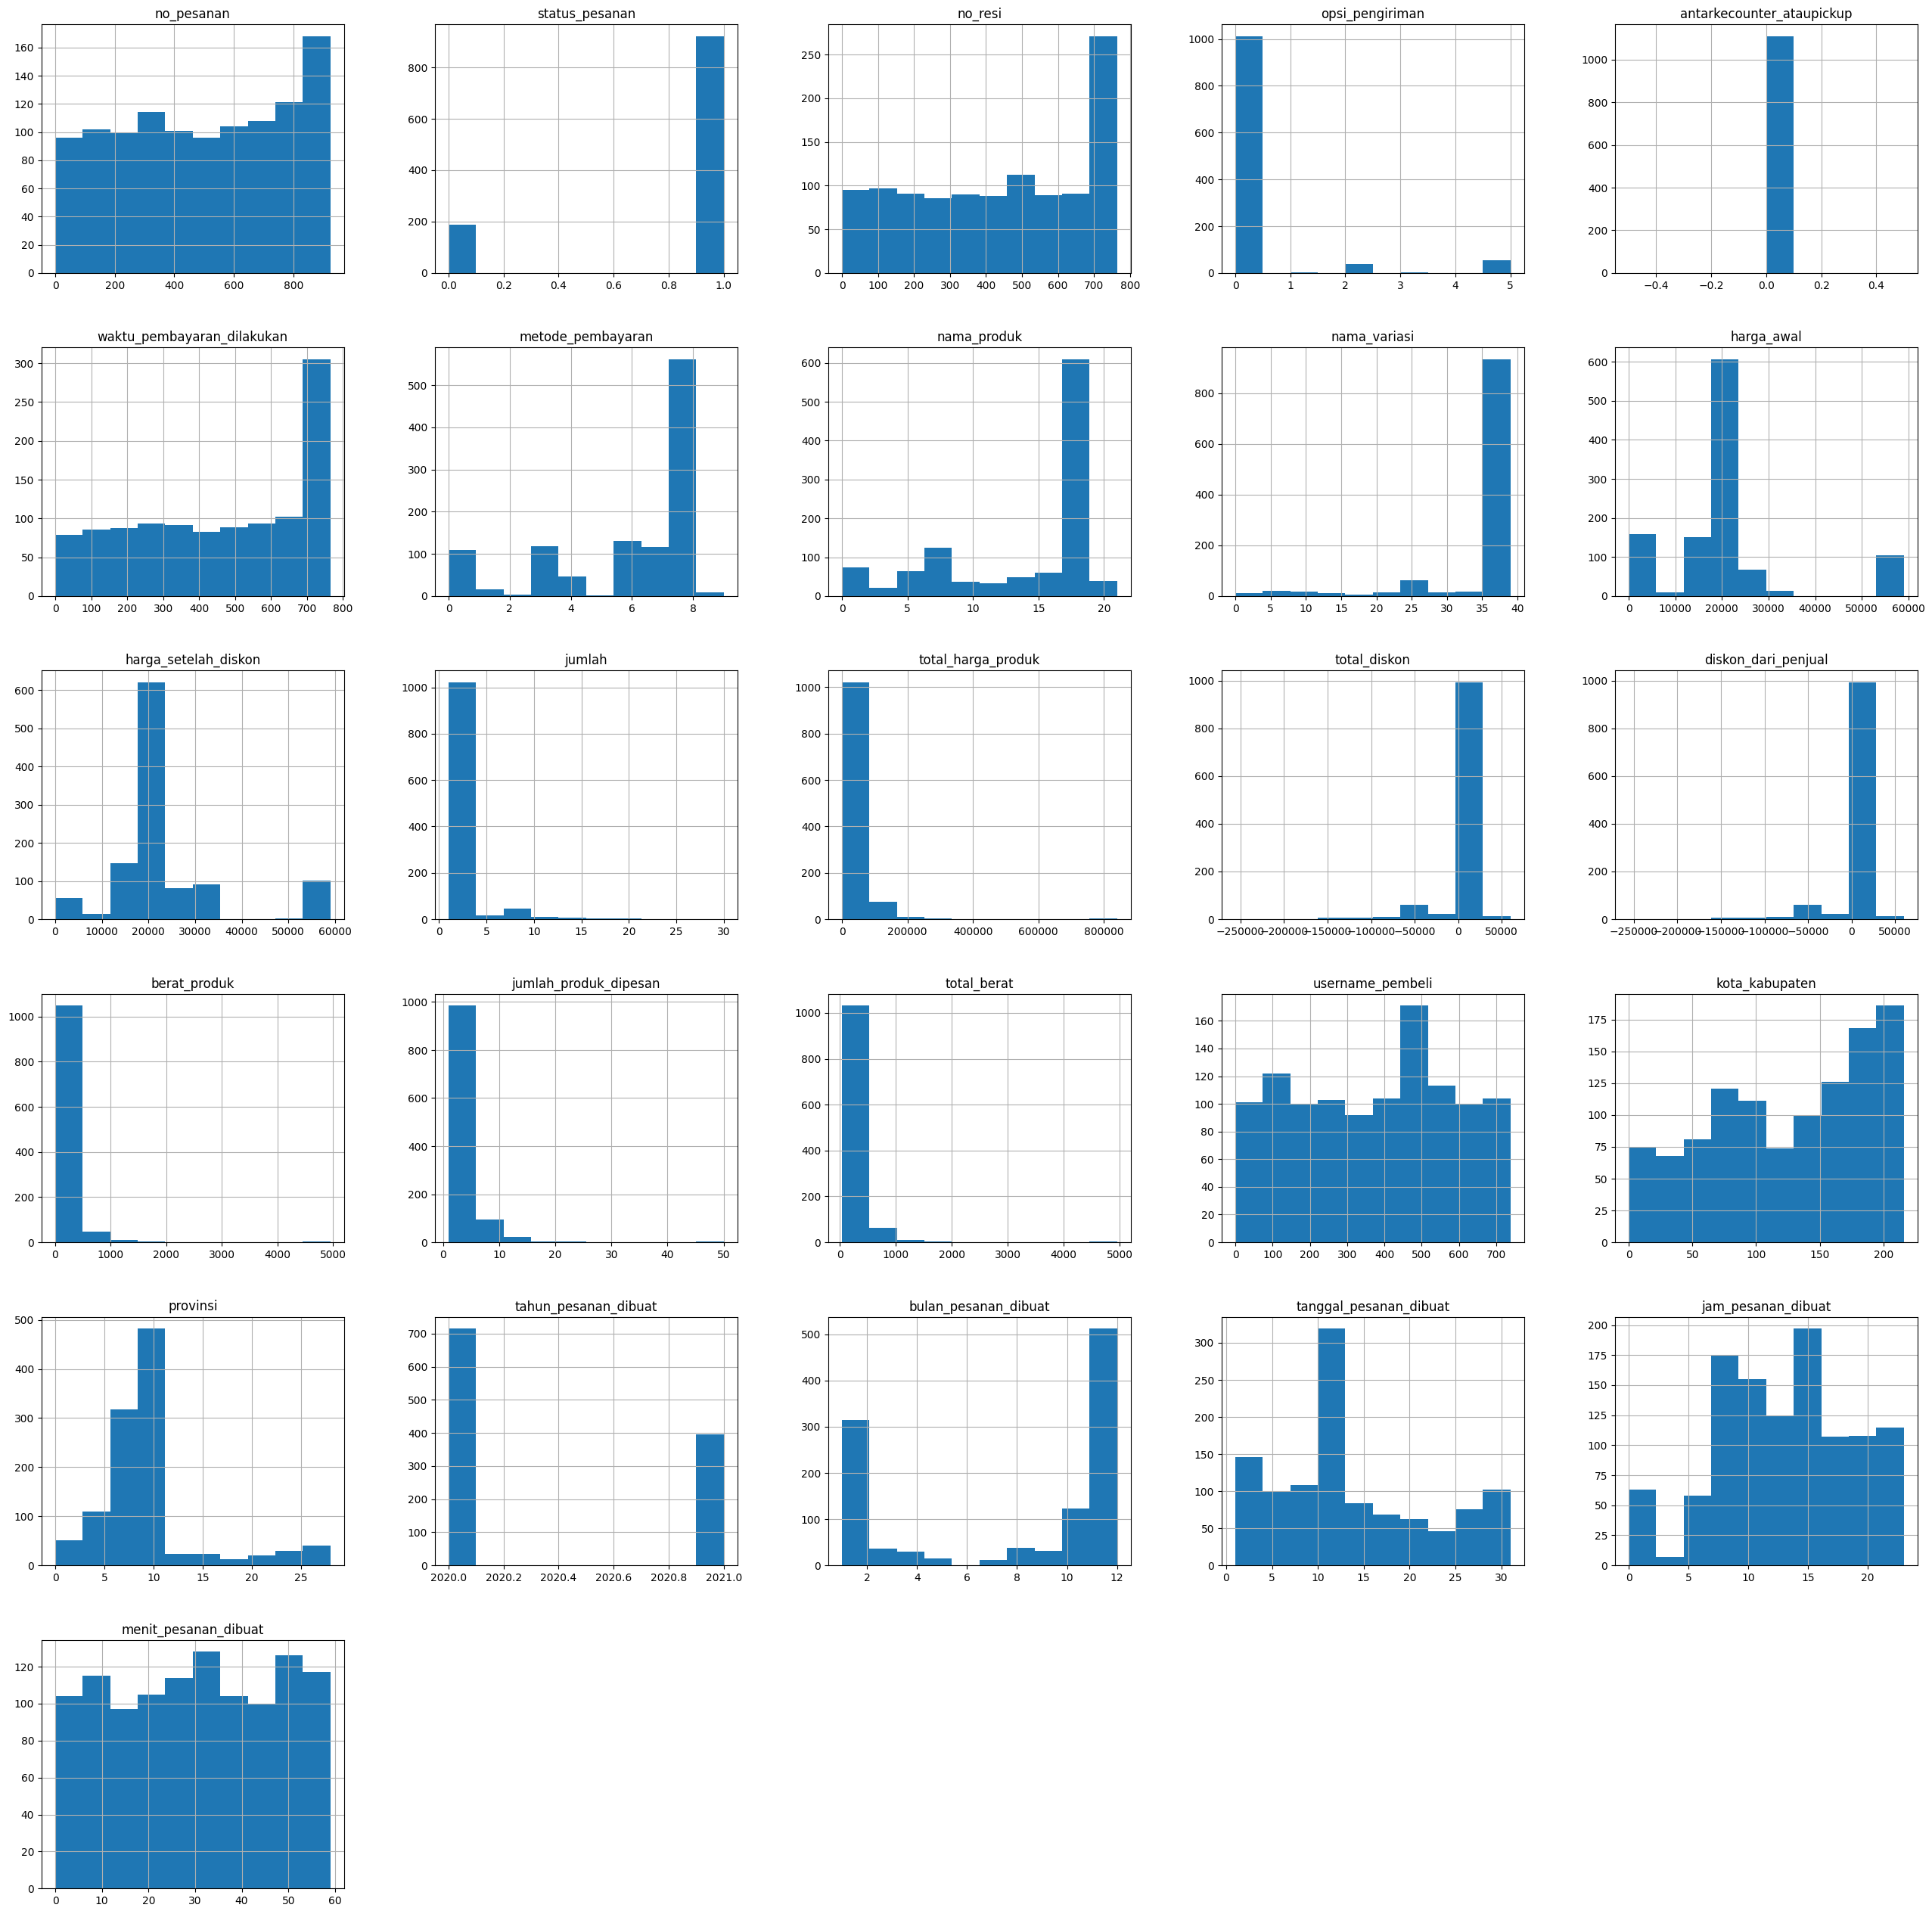

In [39]:
df.hist(figsize=(32,32))

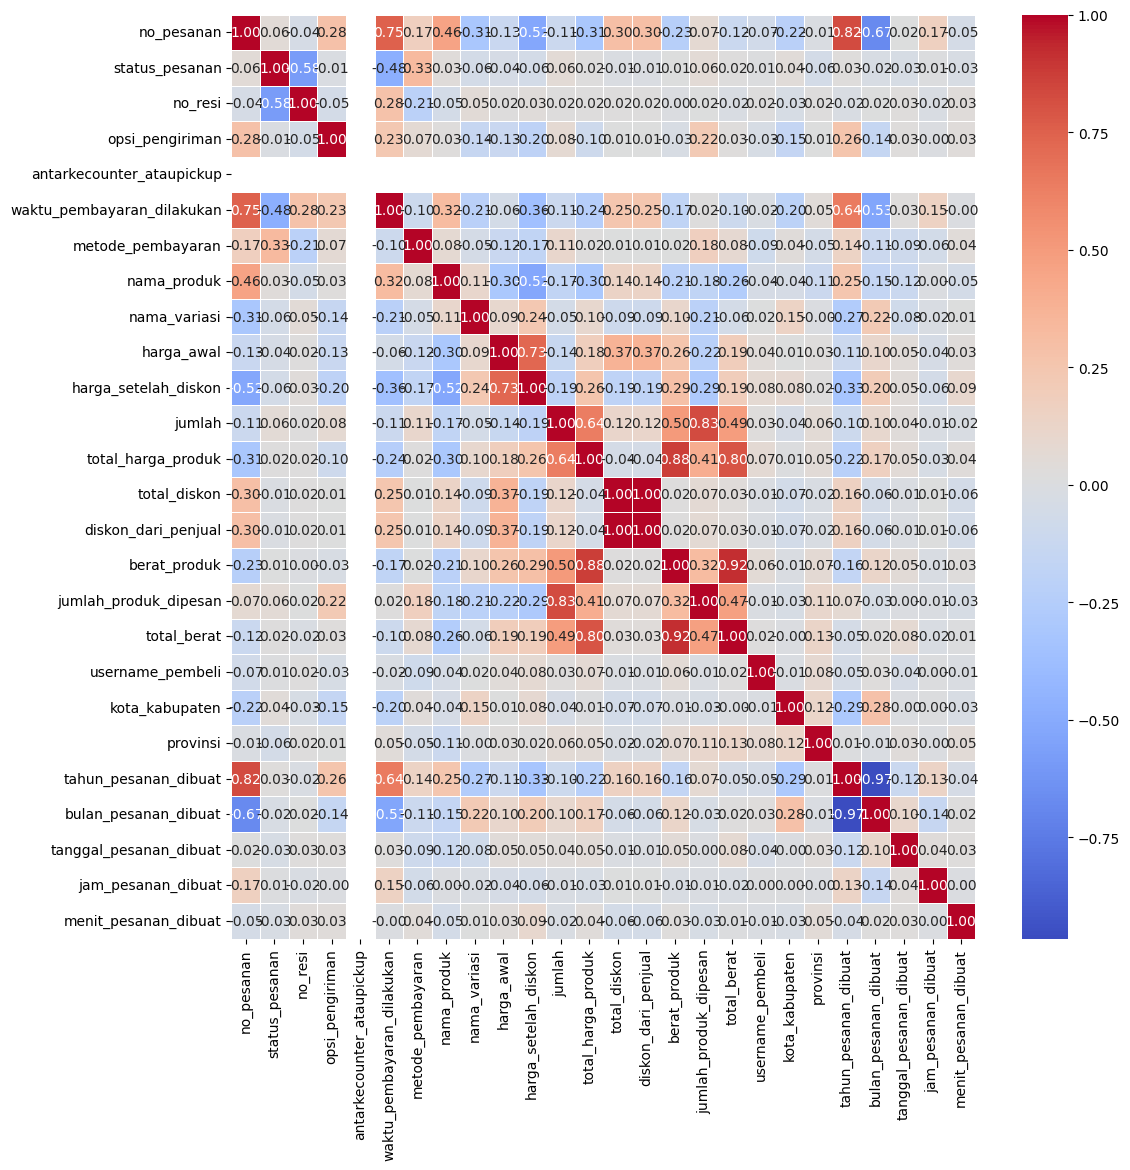

In [40]:
# Corelation Analysis
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

Agglomerative Clustering

In [41]:
#def find_optimal_cluster_number(X):
#    max_score = -1
#    optimal_n_clusters = 2  # min dua klaster
#    for n_clusters in range(2, X.shape[0]):  # buat jumlah baris
#        clustering = AgglomerativeClustering(n_clusters=n_clusters)
#        cluster_labels = clustering.fit_predict(X.toarray())
#        silhouette_avg = silhouette_score(X, cluster_labels)
#        if silhouette_avg > max_score:
#            max_score = silhouette_avg
#            optimal_n_clusters = n_clusters
#    return optimal_n_clusters

Scalable K-Means++

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
# Evaluasi Silhouette Score untuk jumlah klaster dari 2 hingga 11
max_clusters = 11
best_score = -1
optimal_clusters = 2 # min 2 clusters

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=11, random_state=0)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

    # Memilih jumlah klaster dengan nilai silhouette score tertinggi
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        optimal_clusters = n_clusters

# Menggunakan jumlah klaster optimal untuk klasterisasi
#kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=1000, n_init=10, random_state=0)
#cluster_labels = kmeans.fit_predict(df)

# Menambahkan kolom klaster ke dalam DataFrame
#df['Cluster'] = cluster_labels


For n_clusters = 2, the average silhouette_score is: 0.9425772311590577
For n_clusters = 3, the average silhouette_score is: 0.7303430541812852
For n_clusters = 4, the average silhouette_score is: 0.7390134943022787
For n_clusters = 5, the average silhouette_score is: 0.7248768745493155
For n_clusters = 6, the average silhouette_score is: 0.782486415769483
For n_clusters = 7, the average silhouette_score is: 0.789066212038422
For n_clusters = 8, the average silhouette_score is: 0.790438762841294
For n_clusters = 9, the average silhouette_score is: 0.7360594178100366
For n_clusters = 10, the average silhouette_score is: 0.7496186598235087
For n_clusters = 11, the average silhouette_score is: 0.7503573685460949


In [44]:
# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Lakukan standarisasi pada DataFrame
std = scaler.fit_transform(df)

# Hasilnya adalah sebuah NumPy array, Anda dapat mengonversinya kembali ke DataFrame jika diperlukan
std = pd.DataFrame(std, columns=df.columns)
std

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,jumlah_produk_dipesan,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat
0,-1.793229,0.453003,-1.786679,0.602288,0.0,-1.892090,-0.023085,-0.677230,0.379958,-1.561403,...,-0.427470,-0.368815,-0.283159,1.327023,-0.085190,-0.743268,-0.147162,-1.500338,1.237937,1.324438
1,-1.789611,0.453003,-0.108209,-0.285547,0.0,-1.888001,-0.023085,-0.677230,0.379958,-1.561403,...,-0.427470,-0.368815,0.623269,0.388971,-0.085190,-0.743268,-0.147162,-1.379607,-1.241447,0.055447
2,-1.785993,0.453003,0.524258,-0.285547,0.0,-1.883912,0.719641,-0.677230,0.379958,-1.561403,...,-0.427470,-0.368815,0.427671,-0.564980,-0.085190,-0.743268,-0.147162,-1.258875,-0.710150,-0.694411
3,-1.782376,0.453003,-1.782625,2.377958,0.0,-1.879823,-0.023085,-0.677230,0.379958,-1.561403,...,0.146628,0.585707,-0.707748,0.659257,1.054094,-0.743268,-0.147162,-1.138143,1.237937,0.574580
4,-1.778758,0.453003,-1.778571,2.377958,0.0,-1.875734,-2.251261,-0.677230,0.379958,-1.561403,...,-0.427470,-0.368815,1.310245,-0.564980,-0.085190,-0.743268,-0.147162,-0.896679,-0.001755,-0.982819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,1.542254,0.453003,-0.959607,4.153628,0.0,1.223550,0.719641,-0.335537,-2.864299,-1.281371,...,0.433676,-0.238364,-1.299311,-1.407636,-0.085190,1.345409,-0.581603,0.431372,0.529542,0.632261
1106,1.542254,0.453003,-0.959607,4.153628,0.0,1.223550,0.719641,-0.335537,-0.119158,-1.281371,...,0.433676,-0.238364,-1.299311,-1.407636,-0.085190,1.345409,-0.581603,0.431372,0.529542,0.632261
1107,1.542254,0.453003,-0.959607,4.153628,0.0,1.223550,0.719641,0.689543,0.379958,0.049187,...,0.433676,-0.238364,-1.299311,-1.407636,-0.085190,1.345409,-0.581603,0.431372,0.529542,0.632261
1108,1.545872,0.453003,-0.306869,4.153628,0.0,1.227639,0.719641,0.689543,0.379958,0.049187,...,-0.427470,-0.400633,-1.232522,-1.709721,-0.085190,1.345409,-0.581603,0.552104,-0.710150,-0.406004


In [45]:
kmeans=KMeans().fit(std)

In [46]:
kmeans=KMeans(n_clusters=8,init="k-means++").fit(std)

In [47]:
cluster=kmeans.labels_
cluster

array([1, 1, 1, ..., 5, 5, 5])

In [48]:
df["cluster_no"]=cluster
df.head()

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat,cluster_no
0,0,1,3,1,0,0,6,10,39,0.0,...,150,313,210,9,2020,7,1,20,53,1
1,1,1,417,0,0,1,6,10,39,0.0,...,150,503,151,9,2020,7,2,6,31,1
2,2,1,573,0,0,2,8,10,39,0.0,...,150,462,91,9,2020,7,3,9,18,1
3,3,1,4,3,0,3,6,10,39,0.0,...,450,224,168,15,2020,7,4,20,40,7
4,4,1,5,3,0,4,0,10,39,0.0,...,150,647,91,9,2020,7,6,13,13,1


In [49]:
df.head(50)

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat,cluster_no
0,0,1,3,1,0,0,6,10,39,0.0,...,150,313,210,9,2020,7,1,20,53,1
1,1,1,417,0,0,1,6,10,39,0.0,...,150,503,151,9,2020,7,2,6,31,1
2,2,1,573,0,0,2,8,10,39,0.0,...,150,462,91,9,2020,7,3,9,18,1
3,3,1,4,3,0,3,6,10,39,0.0,...,450,224,168,15,2020,7,4,20,40,7
4,4,1,5,3,0,4,0,10,39,0.0,...,150,647,91,9,2020,7,6,13,13,1
5,5,1,6,1,0,5,6,10,39,0.0,...,150,59,210,9,2020,7,6,20,16,1
6,6,1,693,0,0,6,8,10,39,0.0,...,600,167,154,2,2020,7,17,16,49,7
7,7,1,372,0,0,7,3,10,39,0.0,...,150,507,210,9,2020,7,23,13,34,1
8,8,0,764,0,0,765,3,10,39,0.0,...,150,396,91,9,2020,7,24,18,49,2
9,9,1,697,0,0,8,8,9,39,0.0,...,750,626,126,9,2020,7,31,17,17,7


In [50]:
df.tail(50)

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat,cluster_no
1060,900,1,595,5,0,740,8,12,38,3999.0,...,194,671,209,10,2021,3,20,11,28,5
1061,901,1,412,5,0,742,1,15,25,28000.0,...,320,529,191,9,2021,3,21,19,1,5
1062,901,1,412,5,0,742,1,15,24,28000.0,...,320,529,191,9,2021,3,21,19,1,5
1063,902,1,644,5,0,743,7,18,39,23000.0,...,140,291,206,13,2021,3,21,21,22,5
1064,903,1,672,5,0,744,6,15,21,28000.0,...,160,471,4,4,2021,3,22,14,5,5
1065,904,1,555,5,0,745,8,18,39,23000.0,...,140,658,214,14,2021,3,28,19,55,5
1066,905,1,404,5,0,746,8,13,15,990.0,...,850,449,23,9,2021,4,1,11,37,3
1067,905,1,404,5,0,746,8,13,34,990.0,...,850,449,23,9,2021,4,1,11,37,3
1068,906,1,148,5,0,747,4,18,39,23000.0,...,140,728,182,5,2021,4,2,14,8,5
1069,907,1,270,5,0,748,8,18,39,23000.0,...,170,521,59,2,2021,4,3,10,50,5


In [51]:
df.cluster_no.value_counts()

cluster_no
0    367
5    327
2    149
6     99
1     79
3     72
7     14
4      3
Name: count, dtype: int64

In [52]:
subset = df.loc[:, df.columns != 'cluster_no']
subset.head()

,no_pesanan,status_pesanan,no_resi,opsi_pengiriman,antarkecounter_ataupickup,waktu_pembayaran_dilakukan,metode_pembayaran,nama_produk,nama_variasi,harga_awal,...,jumlah_produk_dipesan,total_berat,username_pembeli,kota_kabupaten,provinsi,tahun_pesanan_dibuat,bulan_pesanan_dibuat,tanggal_pesanan_dibuat,jam_pesanan_dibuat,menit_pesanan_dibuat
0,0,1,3,1,0,0,6,10,39,0.0,...,1,150,313,210,9,2020,7,1,20,53
1,1,1,417,0,0,1,6,10,39,0.0,...,1,150,503,151,9,2020,7,2,6,31
2,2,1,573,0,0,2,8,10,39,0.0,...,1,150,462,91,9,2020,7,3,9,18
3,3,1,4,3,0,3,6,10,39,0.0,...,3,450,224,168,15,2020,7,4,20,40
4,4,1,5,3,0,4,0,10,39,0.0,...,1,150,647,91,9,2020,7,6,13,13


In [53]:
# Menginisialisasi model K-Means++ dengan 8 klaster
kmeans = KMeans(n_clusters=8, init="k-means++", random_state=0)

# Melatih model
kmeans.fit(subset)

# Mendapatkan label klaster untuk setiap data
labels = kmeans.labels_

# Mendapatkan posisi centroid
centroids = kmeans.cluster_centers_

#print("Label Klaster:", labels)
print("Posisi Centroid:", centroids)

Posisi Centroid: [[ 6.01355850e+02  8.28709288e-01  4.37550060e+02  3.89626055e-01
   0.00000000e+00  5.35248492e+02  6.13268999e+00  1.61809409e+01
   3.53703257e+01  2.10483534e+04  2.06499071e+04  1.19059107e+00
   2.21767334e+04  3.90657419e+02  3.90657419e+02  1.32899879e+02
   2.03618818e+00  1.97782871e+02  3.64605549e+02  1.24102533e+02
   9.23884198e+00  2.02046562e+03  7.02895054e+00  1.30735826e+01
   1.31640531e+01  2.94451146e+01]
 [ 1.00000000e+02  5.00000000e-01  6.50000000e+02  0.00000000e+00
   0.00000000e+00  4.21500000e+02  6.00000000e+00  1.50000000e+00
   3.90000000e+01  5.90000000e+04  5.60000000e+04  1.50000000e+01
   8.40000000e+05  4.50000000e+04  4.50000000e+04  4.95000000e+03
   1.50000000e+01  4.95000000e+03  6.17000000e+02  9.90000000e+01
   9.00000000e+00  2.02000000e+03  1.00000000e+01  3.50000000e+00
   1.20000000e+01  5.60000000e+01]
 [ 1.22666667e+02  8.33333333e-01  3.85833333e+02  7.50000000e-01
   0.00000000e+00  1.88416667e+02  6.75000000e+00  9.66

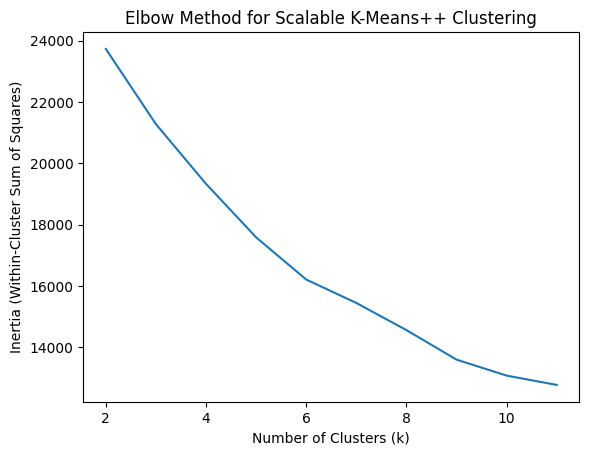

In [54]:
# Define a range of k values to try
k_values = range(2, 12)  # Adjust the upper bound as needed

# Initialize a list to store the average within-cluster sum of squares (inertia)
inertia_values = []

# Calculate the k-means for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(std)
    
    # Append the inertia (within-cluster sum of squares) to the list
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values for each k
plt.plot(k_values, inertia_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Scalable K-Means++ Clustering')
plt.show()

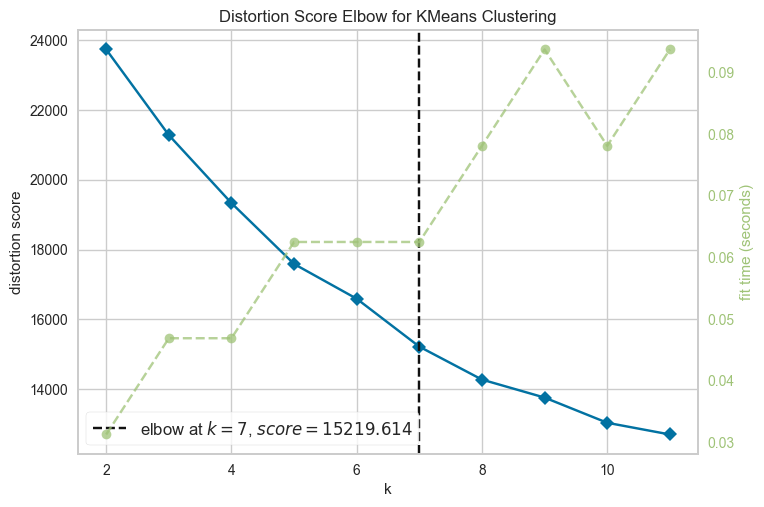

In [55]:
from yellowbrick.cluster import KElbowVisualizer

kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(2,12))
visualizer.fit(std)
visualizer.poof()
plt.show()

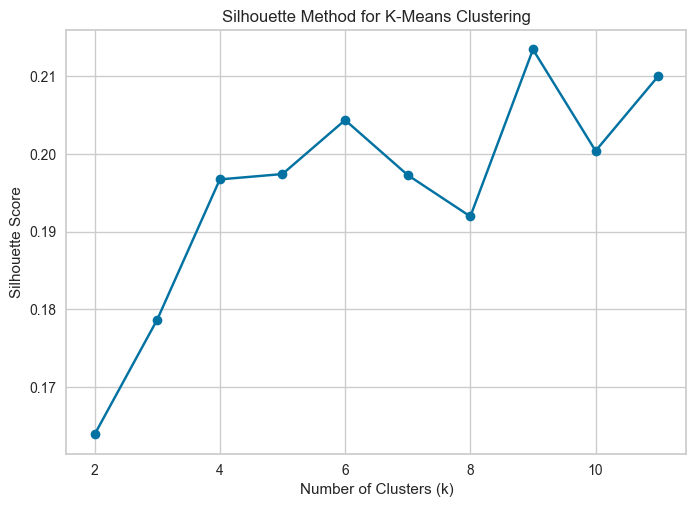

In [56]:
# Define a range of k values to try
k_values = range(2, 12)  # Adjust the upper bound as needed

# Initialize a list to store silhouette scores
silhouette_scores = []

# Calculate the silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
    cluster_labels = kmeans.fit_predict(std)
    silhouette_avg = silhouette_score(std, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for each k
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for K-Means Clustering')
plt.show()

In [57]:
#df.head(20)

In [58]:
#df.tail(20)

In [59]:
#df.Cluster.value_counts()

In [60]:
# Mengubah data menjadi format transaksi
#transaksi = []
#for row in df.itertuples():
#    transaksi.append(list(row[1:]))

# Menentukan nilai minimum support dan confidence
#min_support = 0.02
#min_confidence = 0.5

# Menemukan frequent itemset
#from apyori import apriori

#frequent_itemsets = apriori(transaksi, min_support=min_support, min_confidence=min_confidence)

# Menampilkan hasil
#for itemset in frequent_itemsets:
#    print(itemset)

array([[<Axes: title={'center': 'no_pesanan'}>,
        <Axes: title={'center': 'status_pesanan'}>,
        <Axes: title={'center': 'no_resi'}>,
        <Axes: title={'center': 'opsi_pengiriman'}>,
        <Axes: title={'center': 'antarkecounter_ataupickup'}>],
       [<Axes: title={'center': 'waktu_pembayaran_dilakukan'}>,
        <Axes: title={'center': 'metode_pembayaran'}>,
        <Axes: title={'center': 'nama_produk'}>,
        <Axes: title={'center': 'nama_variasi'}>,
        <Axes: title={'center': 'harga_awal'}>],
       [<Axes: title={'center': 'harga_setelah_diskon'}>,
        <Axes: title={'center': 'jumlah'}>,
        <Axes: title={'center': 'total_harga_produk'}>,
        <Axes: title={'center': 'total_diskon'}>,
        <Axes: title={'center': 'diskon_dari_penjual'}>],
       [<Axes: title={'center': 'berat_produk'}>,
        <Axes: title={'center': 'jumlah_produk_dipesan'}>,
        <Axes: title={'center': 'total_berat'}>,
        <Axes: title={'center': 'username_pembe

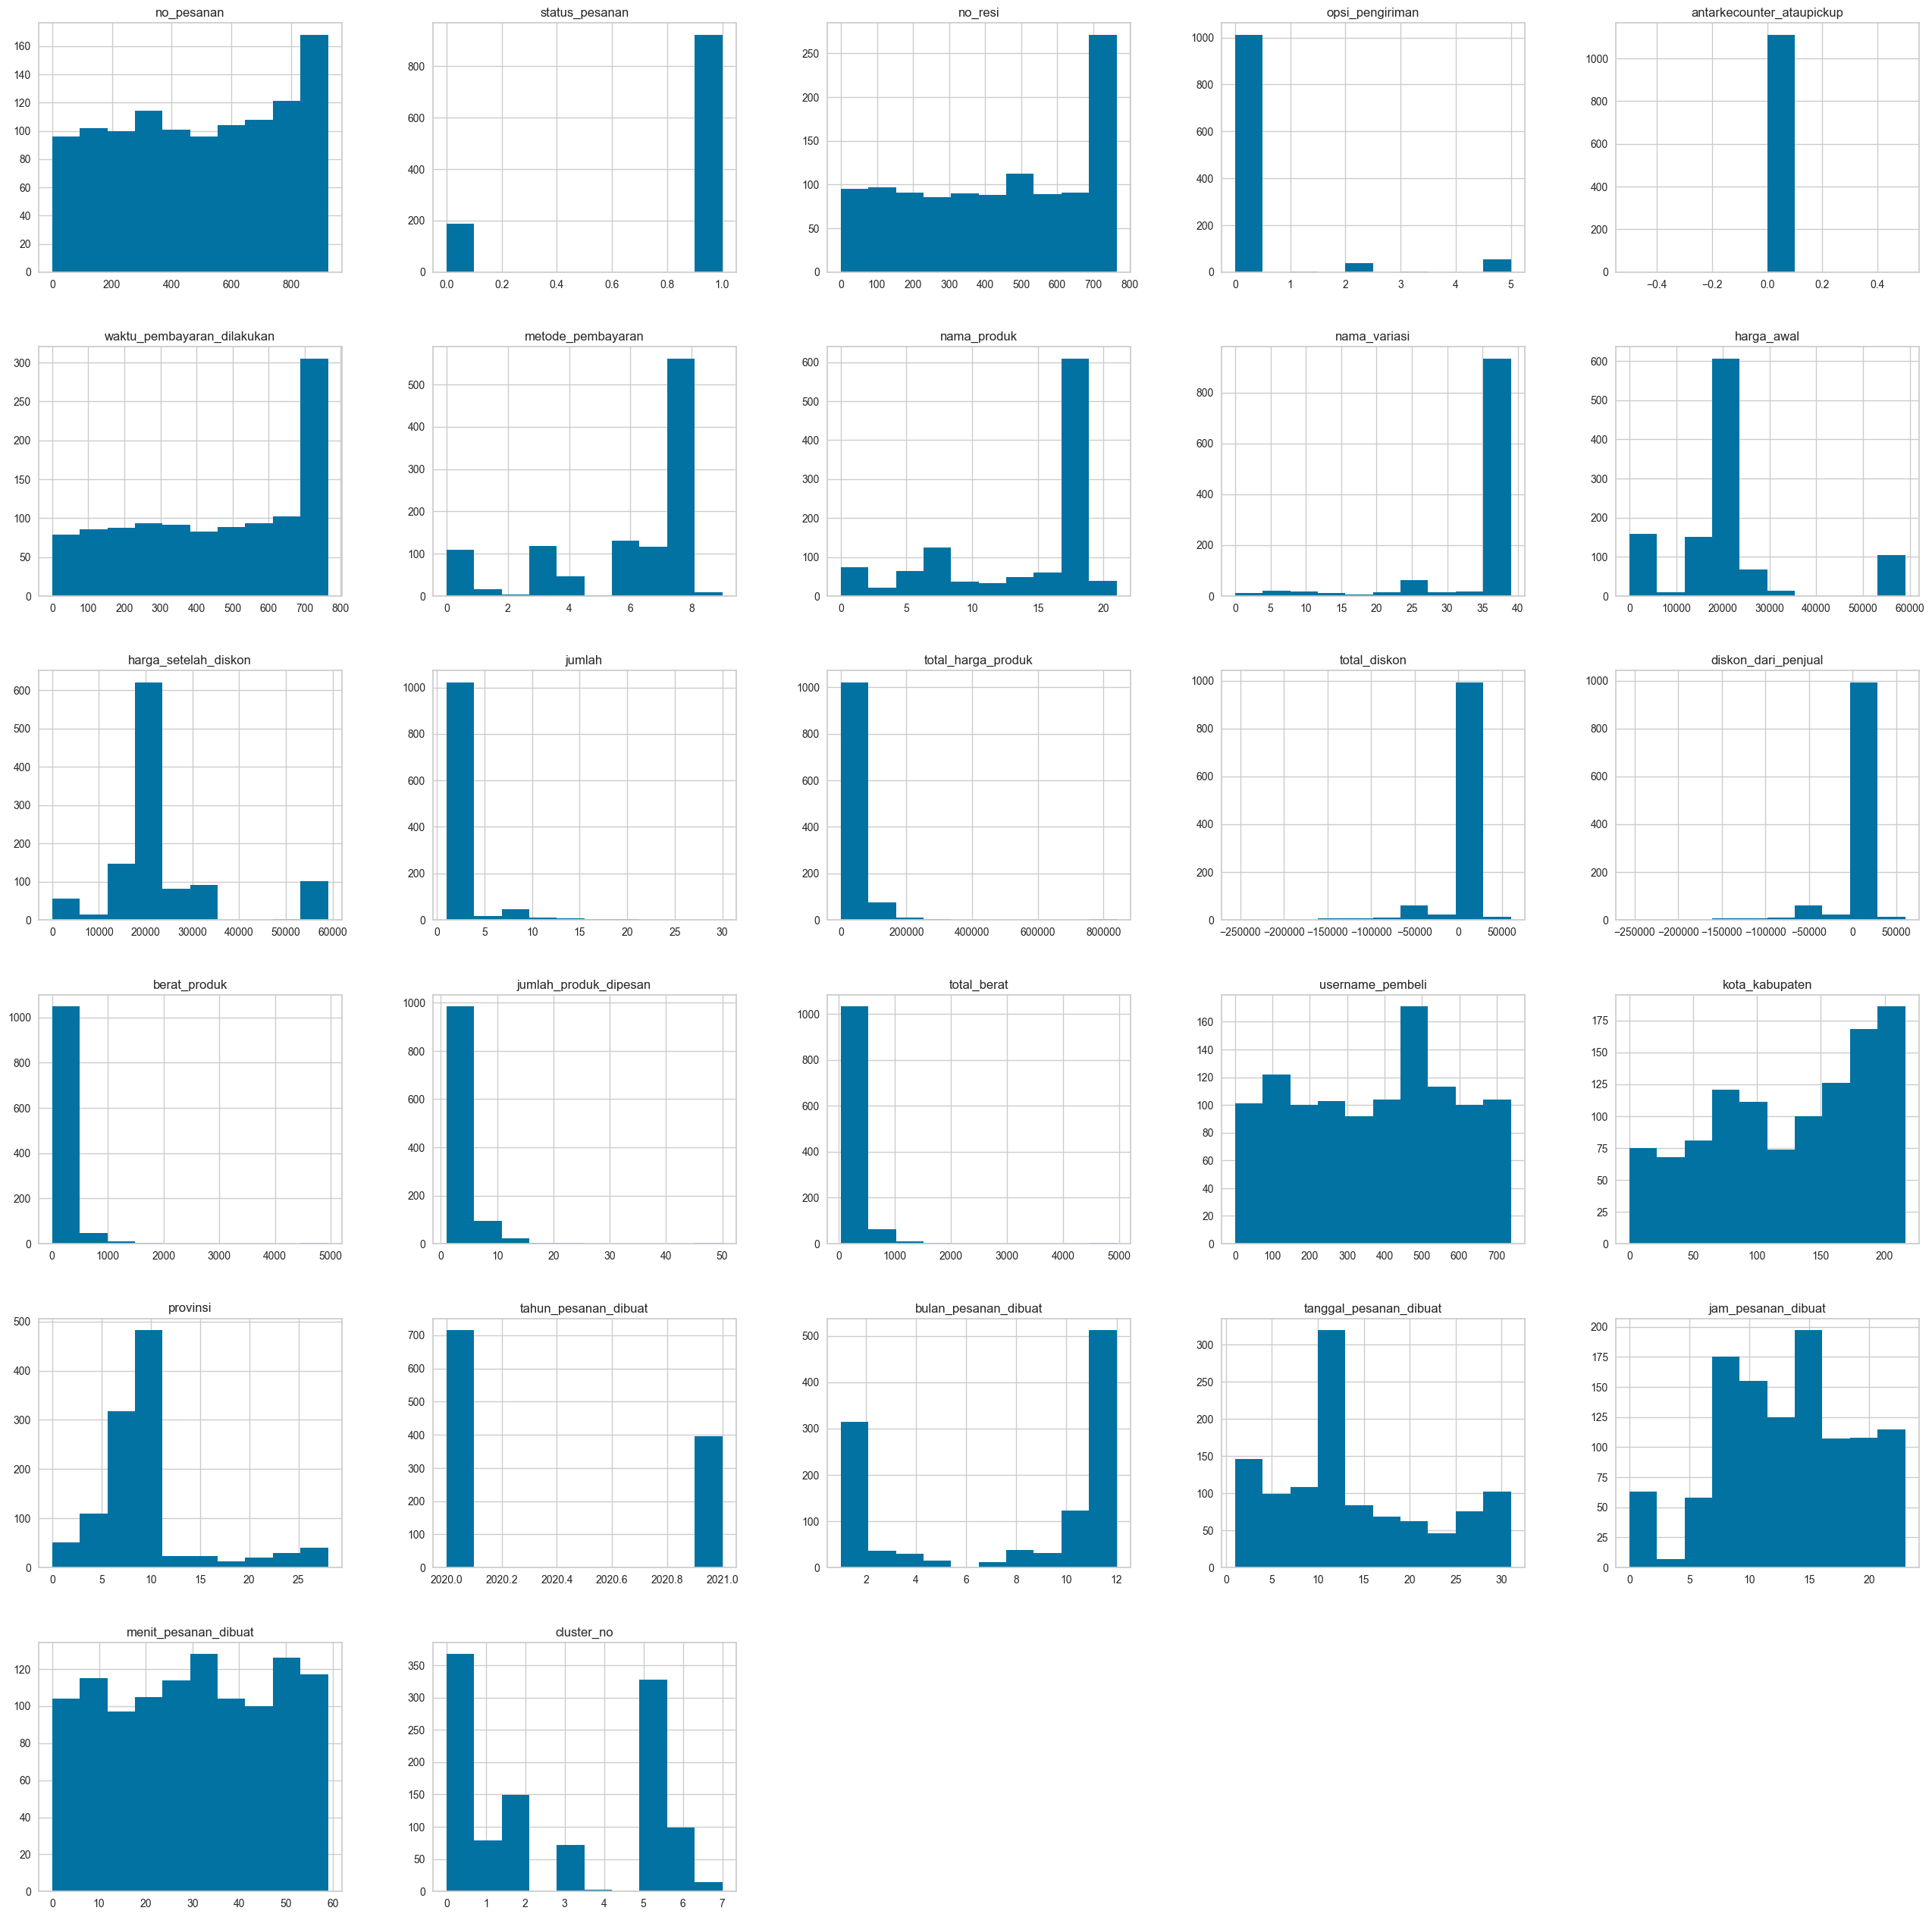

In [61]:
df.hist(figsize=(32,32))

In [70]:
# Filter data for cluster 0
cluster_0 = df[df['cluster_no'] == 0]
print(cluster_0)

     no_pesanan  status_pesanan  no_resi  opsi_pengiriman  \
150         144               1      599                0   
155         148               0      764                0   
163         154               1      464                0   
173         162               1       72                0   
178         166               1      325                0   
..          ...             ...      ...              ...   
708         642               1      332                0   
710         644               1      256                0   
711         645               1      579                0   
712         646               1      406                0   
713         647               1      287                0   

     antarkecounter_ataupickup  waktu_pembayaran_dilakukan  metode_pembayaran  \
150                          0                         113                  3   
155                          0                         116                  8   
163                     

In [72]:
# Filter data for cluster 4
cluster_4 = df[df['cluster_no'] == 4]
print(cluster_4)

     no_pesanan  status_pesanan  no_resi  opsi_pengiriman  \
79           78               1        0                4   
100          97               0      764                0   
106         103               1      536                0   

     antarkecounter_ataupickup  waktu_pembayaran_dilakukan  metode_pembayaran  \
79                           0                          60                  8   
100                          0                         765                  6   
106                          0                          78                  6   

     nama_produk  nama_variasi  harga_awal  ...  total_berat  \
79             1            39     59000.0  ...         4500   
100            3            39     59000.0  ...         4950   
106            0            39     59000.0  ...         4950   

     username_pembeli  kota_kabupaten  provinsi  tahun_pesanan_dibuat  \
79                388             111        28                  2020   
100               617      

In [73]:
# Filter data for cluster 6
cluster_6 = df[df['cluster_no'] == 6]
print(cluster_6)

     no_pesanan  status_pesanan  no_resi  opsi_pengiriman  \
57           57               0      764                0   
59           58               1      661                0   
60           59               1      403                0   
62           61               1      736                0   
65           64               1      451                0   
..          ...             ...      ...              ...   
424         379               1       18                2   
450         401               1      219                0   
553         499               1      641                0   
686         626               1      399                0   
898         797               1      679                0   

     antarkecounter_ataupickup  waktu_pembayaran_dilakukan  metode_pembayaran  \
57                           0                         765                  0   
59                           0                          49                  0   
60                      